In [1]:
# Import Library / Read csv
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('baseSemNulls.csv')

In [2]:
print("INFO Dataset: ", df.shape)
df.head()

INFO Dataset:  (58090, 16)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.645669,0.706818,0.0,0.147783,0.848276,0.339130,0.089552,0.263158,0.20,0.13,0.430718,0.441748,0.250,0.555556,0.0,0.0
1,0.658793,0.563636,0.0,0.182266,0.896552,0.243478,0.283582,0.250000,0.30,0.08,0.540902,0.566343,0.125,0.111111,0.0,0.0
2,0.685039,0.761364,0.0,0.133005,0.731034,0.321739,0.447761,0.197368,0.42,0.22,0.530885,0.519417,0.125,0.666667,0.0,0.0
3,0.750656,0.779545,0.0,0.140394,0.841379,0.191304,0.089552,0.078947,0.37,0.22,0.537563,0.517799,0.125,0.555556,0.0,0.0
4,0.811024,0.838636,0.0,0.137931,0.579310,0.226087,0.253731,0.171053,0.19,0.15,0.504174,0.490291,0.125,0.666667,0.0,0.0


In [3]:
### Seperar Target e Source
x = df.values[:,0:15]
y = df.values[:,15]

In [4]:
### Split the TEST_data and TRAIN_data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state= 100)

In [5]:
# Decision Tree
clf = DecisionTreeClassifier(max_leaf_nodes= 77)
clf.fit(x_train,y_train)
predict = clf.predict(x_test)   

In [6]:
predict = clf.predict(x_test)
print('Precisão é ',accuracy_score(y_test,predict)*100)

Precisão é  84.57565846100879


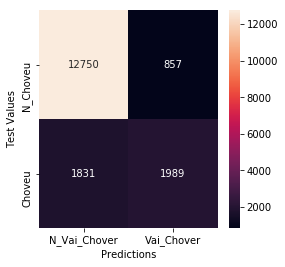

In [7]:
# Matriz de Confusão
cm = confusion_matrix(y_test,predict)

cm_df = pd.DataFrame(cm,
                     index = ['N_Choveu','Choveu'], 
                     columns = ['N_Vai_Chover','Vai_Chover'])


f, ax = plt.subplots(figsize = (4,4))
sns.heatmap(cm_df,annot=True,linecolor="blue",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()


In [8]:
kf = KFold(n_splits=3)
total = 0
Arvlist = []
for train_index , test_index in kf.split(df):
    x_train, x_test, y_train , y_test = x[train_index], x[test_index] , y[train_index] , y[test_index]
    
    arv = DecisionTreeClassifier(max_leaf_nodes= 77)
    arv.fit(x_train,y_train)
    predict = arv.predict(x_test)
    Arvlist.append(accuracy_score(y_test,predict)*100)
    total = total + (accuracy_score(y_test,predict)*100)

total = total / 3

In [9]:
# KFold  Results
print('VALORES KFOLD :' ,Arvlist)
print('Precisão Media :', total)

VALORES KFOLD : [82.39516628795704, 83.24123327996695, 86.77374373805712]
Precisão Media : 84.13671443532705


In [10]:
 ### Vizualizar a arvore ####

atributos = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'RainToday']
classes = ['N_Chuva','S_Chuva']

from sklearn.externals.six import StringIO
from sklearn import tree
import pydot

dot_data = StringIO()
tree.export_graphviz(clf,
                    out_file=dot_data,
                    feature_names=atributos,
                    class_names=classes,
                    filled=True, rounded=True, impurity=False)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
#graph[0].write_pdf("BestTree.pdf")